In [118]:
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

from scipy.stats import chi2_contingency, shapiro, mannwhitneyu, ttest_ind

In [2]:
df = pd.read_csv("Attrition.csv")

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(1470, 35)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
for column in df.columns:
    if df[column].nunique()==1:
        print("Unique values for column", column,"=1")
    

Unique values for column EmployeeCount =1
Unique values for column Over18 =1
Unique values for column StandardHours =1


In [10]:
df.drop(columns=["StandardHours", "Over18", "EmployeeCount"], inplace=True)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [12]:
df.shape

(1470, 32)

# Data Analysis

## Gender and Age 

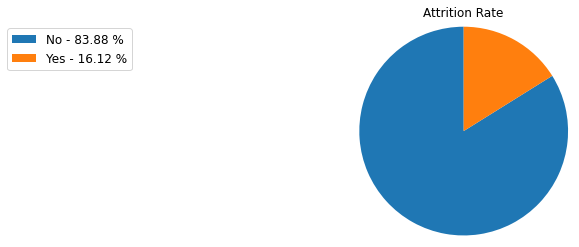

In [13]:
plt.title("Attrition Rate")
x = np.array(list(df["Attrition"].value_counts().index))
y = np.array(df["Attrition"].value_counts())
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

In [14]:
df.hvplot.hist(y="Age", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

**Erkek kadınlara göre ayrılmaya daha meyilli midir? <br>
Genç olan erkekler yaşı ilerlemiş erkeklere göre ayrılmaya daha meyilli midir?**

In [15]:
df.hvplot.scatter(
               x="Age",
               y="Gender",
               by="Attrition",
               width=800, height=400,
               size=50, alpha=0.5,
               xlabel="Age",
               ylabel="Gender",
               title="Yaş ve Cinsiyete Göre Ayrılma Durumu")

:NdOverlay   [Attrition]
   :Scatter   [Age]   (Gender)

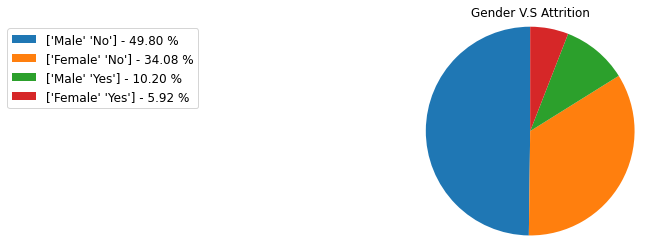

In [16]:
plt.title("Gender V.S Attrition")
x = np.array(list(df[['Gender', 'Attrition']].value_counts().index))
y = np.array(list(df[['Gender', 'Attrition']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

## Business Travel

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

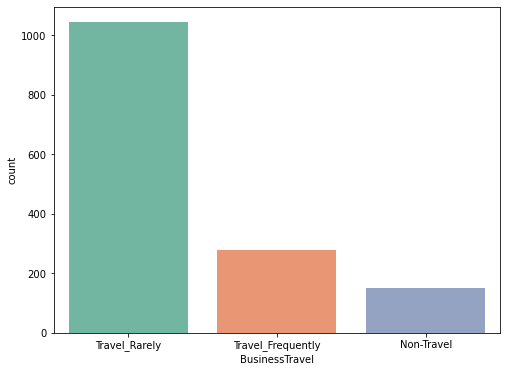

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(df['BusinessTravel'], palette='Set2')

**Sık sık seyahat eden çalışanlar diğer çalışanlara göre ayrılmaya daha meyilli midir?**

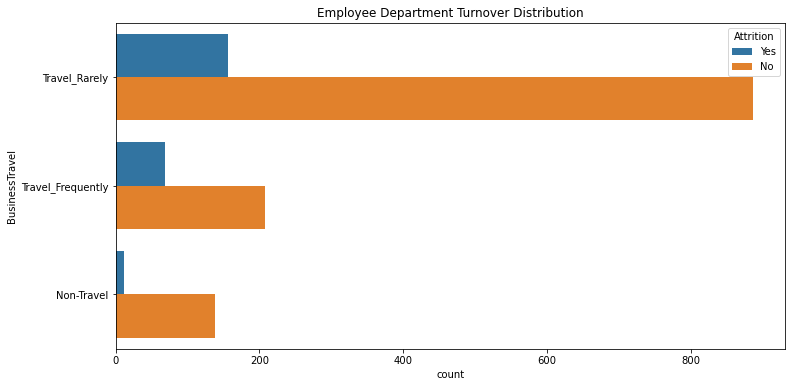

In [18]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="BusinessTravel", hue='Attrition', data=df).set_title('Employee Department Turnover Distribution');

## Daily Rate

In [19]:
df.hvplot.box(y='DailyRate', by='Attrition', height=400, width=400, legend=False, c='Green')

:BoxWhisker   [Attrition]   (DailyRate)

## Department

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

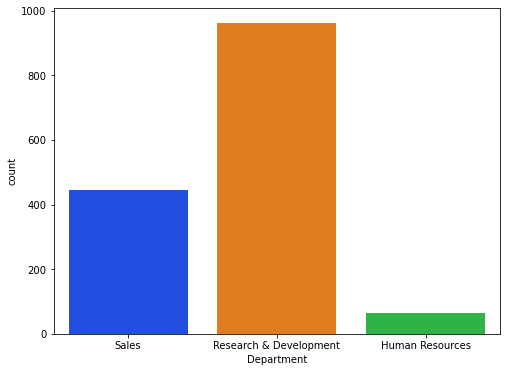

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(df['Department'], palette='bright')

Text(0.5, 1.0, 'Çalışan Departman ve Ayrılma Dağılımı')

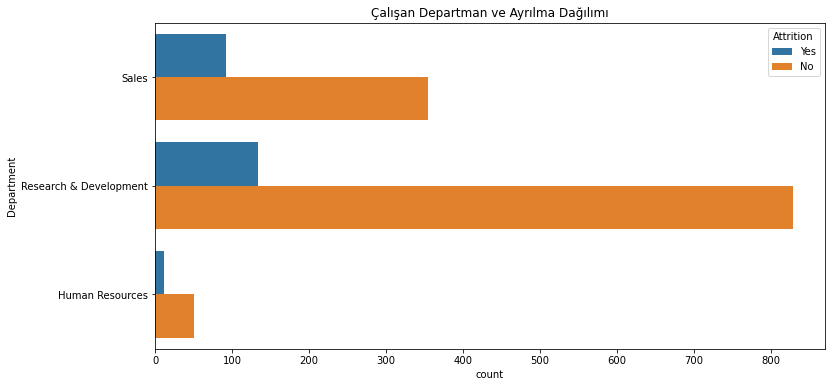

In [21]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="Department", hue='Attrition', data=df).set_title("Çalışan Departman ve Ayrılma Dağılımı")

## Distance From Home

**İşyerine uzaklığı fazla olan kişiler yakın olan kişilere göre ayrılmaya daha mı meyilli?**

In [22]:
df.hvplot.hist(y="DistanceFromHome", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

## Education Field

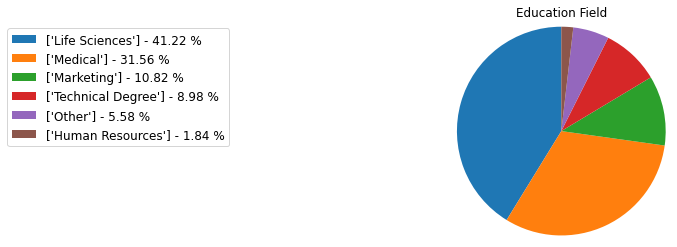

In [23]:
plt.title("Education Field")
x = np.array(list(df[['EducationField']].value_counts().index))
y = np.array(list(df[['EducationField']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

Text(0.5, 1.0, 'Çalışan Eğitim Alanı ve Ayrılma Dağılımı')

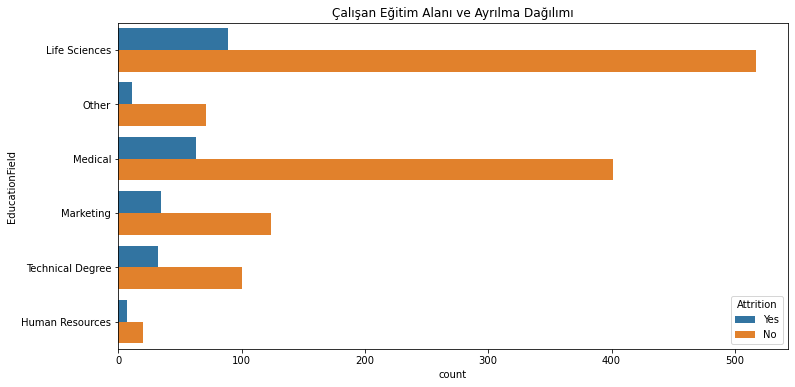

In [24]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="EducationField", hue='Attrition', data=df).set_title('Çalışan Eğitim Alanı ve Ayrılma Dağılımı')

## Environment Satisfaction

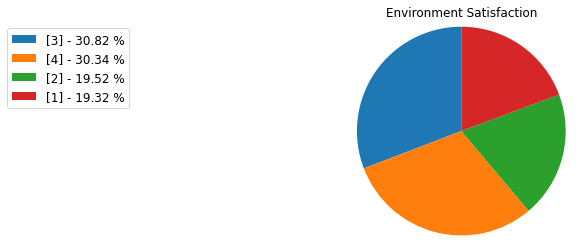

In [25]:
plt.title("Environment Satisfaction")
x = np.array(list(df[['EnvironmentSatisfaction']].value_counts().index))
y = np.array(list(df[['EnvironmentSatisfaction']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

Text(0.5, 1.0, 'Çalışan Memnuniyet Seviyesi ve Ayrılma Dağılımı')

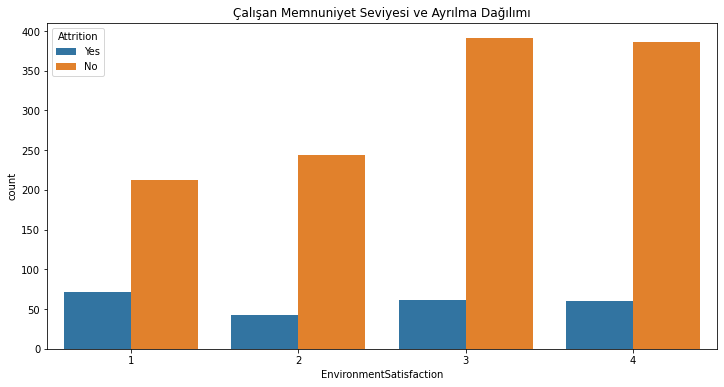

In [26]:
plt.subplots(figsize=(12, 6))
sns.countplot(x="EnvironmentSatisfaction", hue='Attrition', data=df).set_title('Çalışan Memnuniyet Seviyesi ve Ayrılma Dağılımı')

## Job Involvement

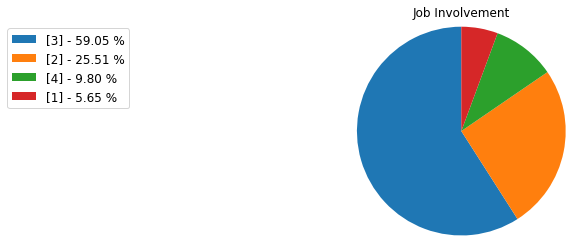

In [27]:
plt.title("Job Involvement")
x = np.array(list(df[['JobInvolvement']].value_counts().index))
y = np.array(list(df[['JobInvolvement']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

**İşe bağlılık seviyesi düşük olan çalışanlar ayrılmaya daha mı meyilli?**

Text(0.5, 1.0, 'Çalışan İşe Bağlılık Seviyesi ve Ayrılma Dağılımı')

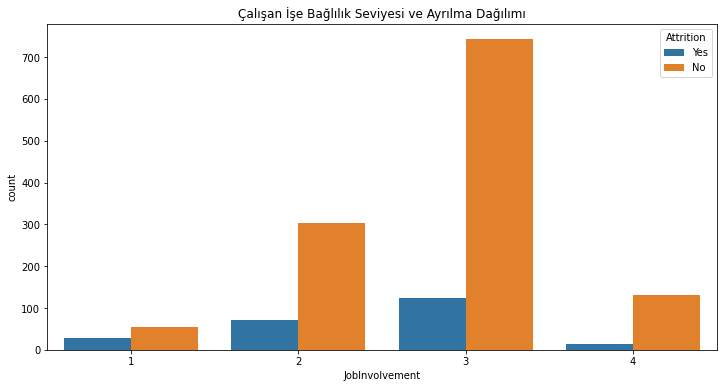

In [28]:
plt.subplots(figsize=(12, 6))
sns.countplot(x="JobInvolvement", hue='Attrition', data=df).set_title('Çalışan İşe Bağlılık Seviyesi ve Ayrılma Dağılımı')

## Job Role

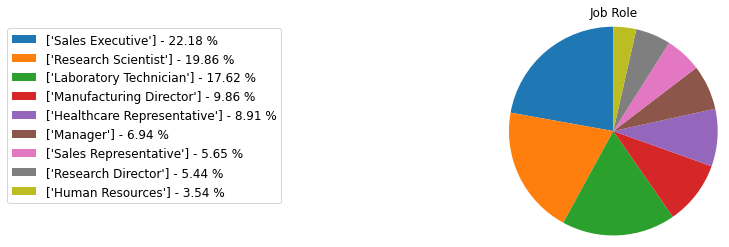

In [29]:
plt.title("Job Role")
x = np.array(list(df[['JobRole']].value_counts().index))
y = np.array(list(df[['JobRole']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

Text(0.5, 1.0, 'Çalışan İş Rolü ve Ayrılma Dağılımı')

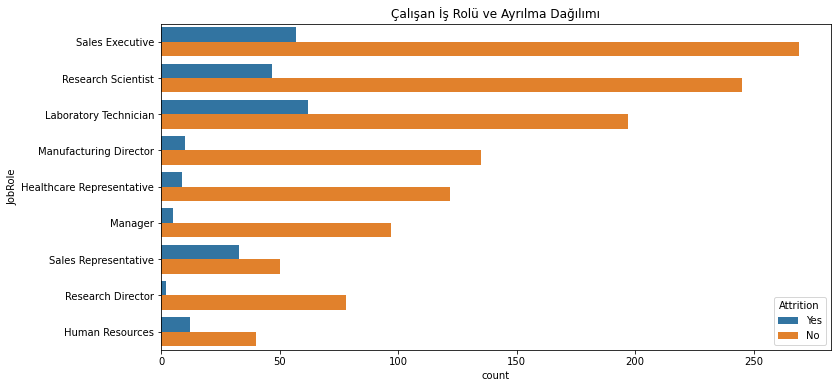

In [30]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="JobRole", hue='Attrition', data=df).set_title('Çalışan İş Rolü ve Ayrılma Dağılımı')

## Job Satisfaction

In [31]:
df.hvplot.hist(y="JobSatisfaction", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

## MaritalStatus

**Bekar kişiler diğerlerine göre ayrılmaya daha mı meyilli?**

Text(0.5, 1.0, 'Çalışan Evlilik Durumu ve Ayrılma Dağılımı')

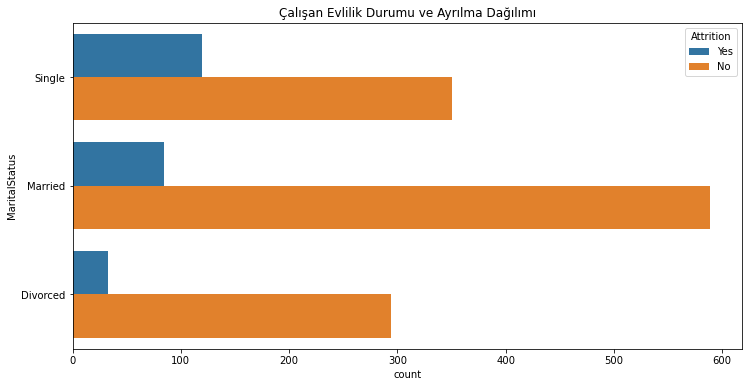

In [32]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="MaritalStatus", hue='Attrition', data=df).set_title('Çalışan Evlilik Durumu ve Ayrılma Dağılımı')

## Monthly Income

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

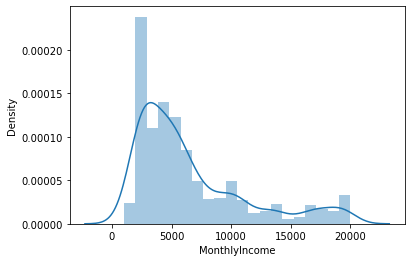

In [33]:
sns.distplot(df['MonthlyIncome'])

**Aylık maaşı az olan kişiler  fazla olan kişilere göre ayrılmaya daha mı meyilli?**

In [34]:
df.hvplot.scatter(
               x="MonthlyIncome",
               y="Gender",
               by="Attrition",
               width=800, height=400,
               size=50, alpha=0.5,
               xlabel="Age",
               ylabel="Gender",
               title="Aylık Gelir ve Cinsiyete Göre Ayrılma Durumu")

:NdOverlay   [Attrition]
   :Scatter   [MonthlyIncome]   (Gender)

## Number of Companies Worked

In [35]:
df.hvplot.hist(y="NumCompaniesWorked", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (NumCompaniesWorked_count)

## OverTime

**Mesai yapan kişiler yapmayan kişilere göre ayrılmaya daha mı meyilli?**

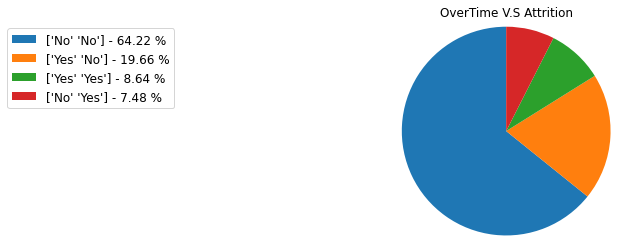

In [36]:
plt.title("OverTime V.S Attrition")
x = np.array(list(df[['OverTime', 'Attrition']].value_counts().index))
y = np.array(list(df[['OverTime', 'Attrition']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

## Percent Salary Hike

**Maaşına az zam alan kişiler fazla zam alan kişilere göre ayrılmaya daha mı meyilli?**

In [37]:
df.hvplot.hist(y="PercentSalaryHike", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

## Performance Rating

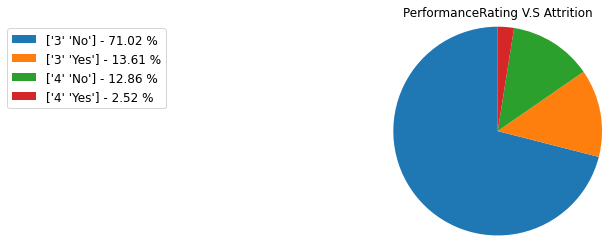

In [38]:
plt.title("PerformanceRating V.S Attrition")
x = np.array(list(df[['PerformanceRating', 'Attrition']].value_counts().index))
y = np.array(list(df[['PerformanceRating', 'Attrition']].value_counts()))
percent = 100.*y/y.sum()

patches, texts = plt.pie(y,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-1, 1.),
           fontsize=12)
plt.show()

## Relationship Satisfaction

Text(0.5, 1.0, 'Çalışan İlişkiler Memnuniyeti ve Ayrılma Dağılımı')

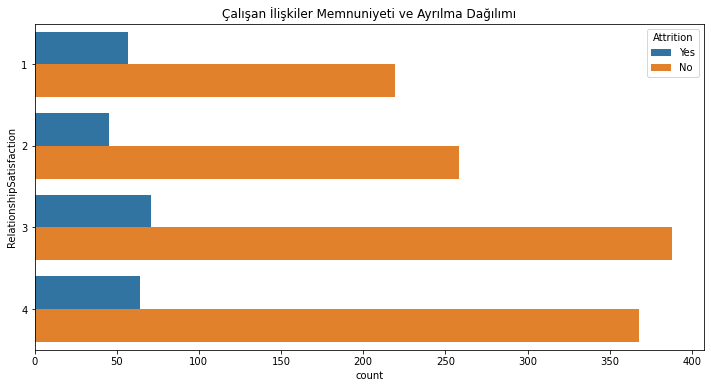

In [39]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="RelationshipSatisfaction", hue='Attrition', data=df).set_title('Çalışan İlişkiler Memnuniyeti ve Ayrılma Dağılımı')

## Stock Option Level

Text(0.5, 1.0, 'Stock Option Seviyesi ve Ayrılma Dağılımı')

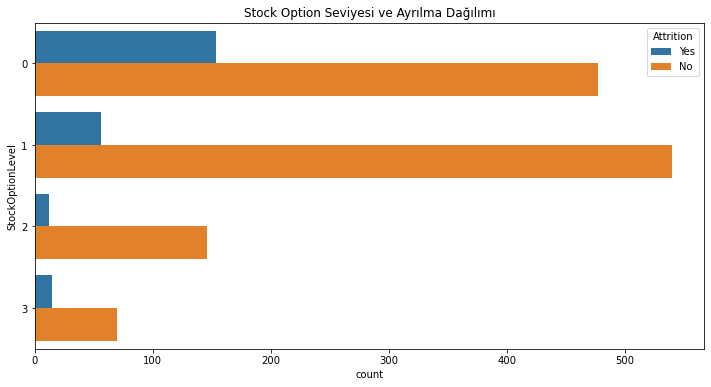

In [40]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="StockOptionLevel", hue='Attrition', data=df).set_title('Stock Option Seviyesi ve Ayrılma Dağılımı')

## Total Working Years

In [41]:
df.hvplot.hist(y="TotalWorkingYears", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

## Training Times Last Year

In [42]:
df.hvplot.hist(y="TrainingTimesLastYear", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (TrainingTimesLastYear_count)

## Work Life Balance

Text(0.5, 1.0, 'İş-Hayat Dengesi ve Ayrılma Dağılımı')

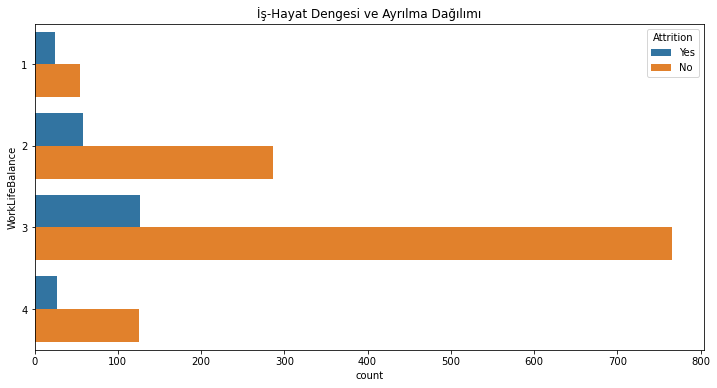

In [43]:
plt.subplots(figsize=(12, 6))
sns.countplot(y="WorkLifeBalance", hue='Attrition', data=df).set_title('İş-Hayat Dengesi ve Ayrılma Dağılımı')

## Years At Company

**Şirkette yeni kişiler eski kişilere göre ayrılmaya daha mı meyilli?**

In [44]:
df.hvplot.hist(y="YearsAtCompany", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

## Years In Current Role

In [45]:
df.hvplot.hist(y="YearsInCurrentRole", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [YearsInCurrentRole]   (YearsInCurrentRole_count)

## Years Since Last Promotion

In [46]:
df.hvplot.hist(y="YearsSinceLastPromotion", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [YearsSinceLastPromotion]   (YearsSinceLastPromotion_count)

## Years With Current Manager

In [47]:
df.hvplot.hist(y="YearsWithCurrManager", by="Attrition", subplots=False, width=600, height=400)

:NdOverlay   [Attrition]
   :Histogram   [YearsWithCurrManager]   (YearsWithCurrManager_count)

# Data Cleaning

In [48]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [51]:
label_encoder = LabelEncoder()
  
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Attrition']= label_encoder.fit_transform(df['Attrition'])
df['OverTime']= label_encoder.fit_transform(df['OverTime'])


df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [52]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [53]:
def setcategory_bus(text):
    
    if text=='Travel_Rarely':
        return 1
    
    elif text=='Travel_Frequently':
        return 2
    
    else:
        return 0
        
    
    
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda text:setcategory_bus(text))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [54]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [55]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [56]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [57]:
df = pd.get_dummies(df, columns = ['Department',"EducationField", "JobRole", "MaritalStatus"])

In [58]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,5,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,7,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [59]:
df.EmployeeNumber.nunique()

1470

In [60]:
df.drop(columns=["Education"], inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   BusinessTravel                     1470 non-null   int64
 3   DailyRate                          1470 non-null   int64
 4   DistanceFromHome                   1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   Gender                             1470 non-null   int32
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.086395,0.532170,0.0,1.00,1.0,1.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
Gender,1470.0,0.600000,0.490065,0.0,0.00,1.0,1.00,1.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


[Text(0.5, 1.0, 'Correlation Matrix')]

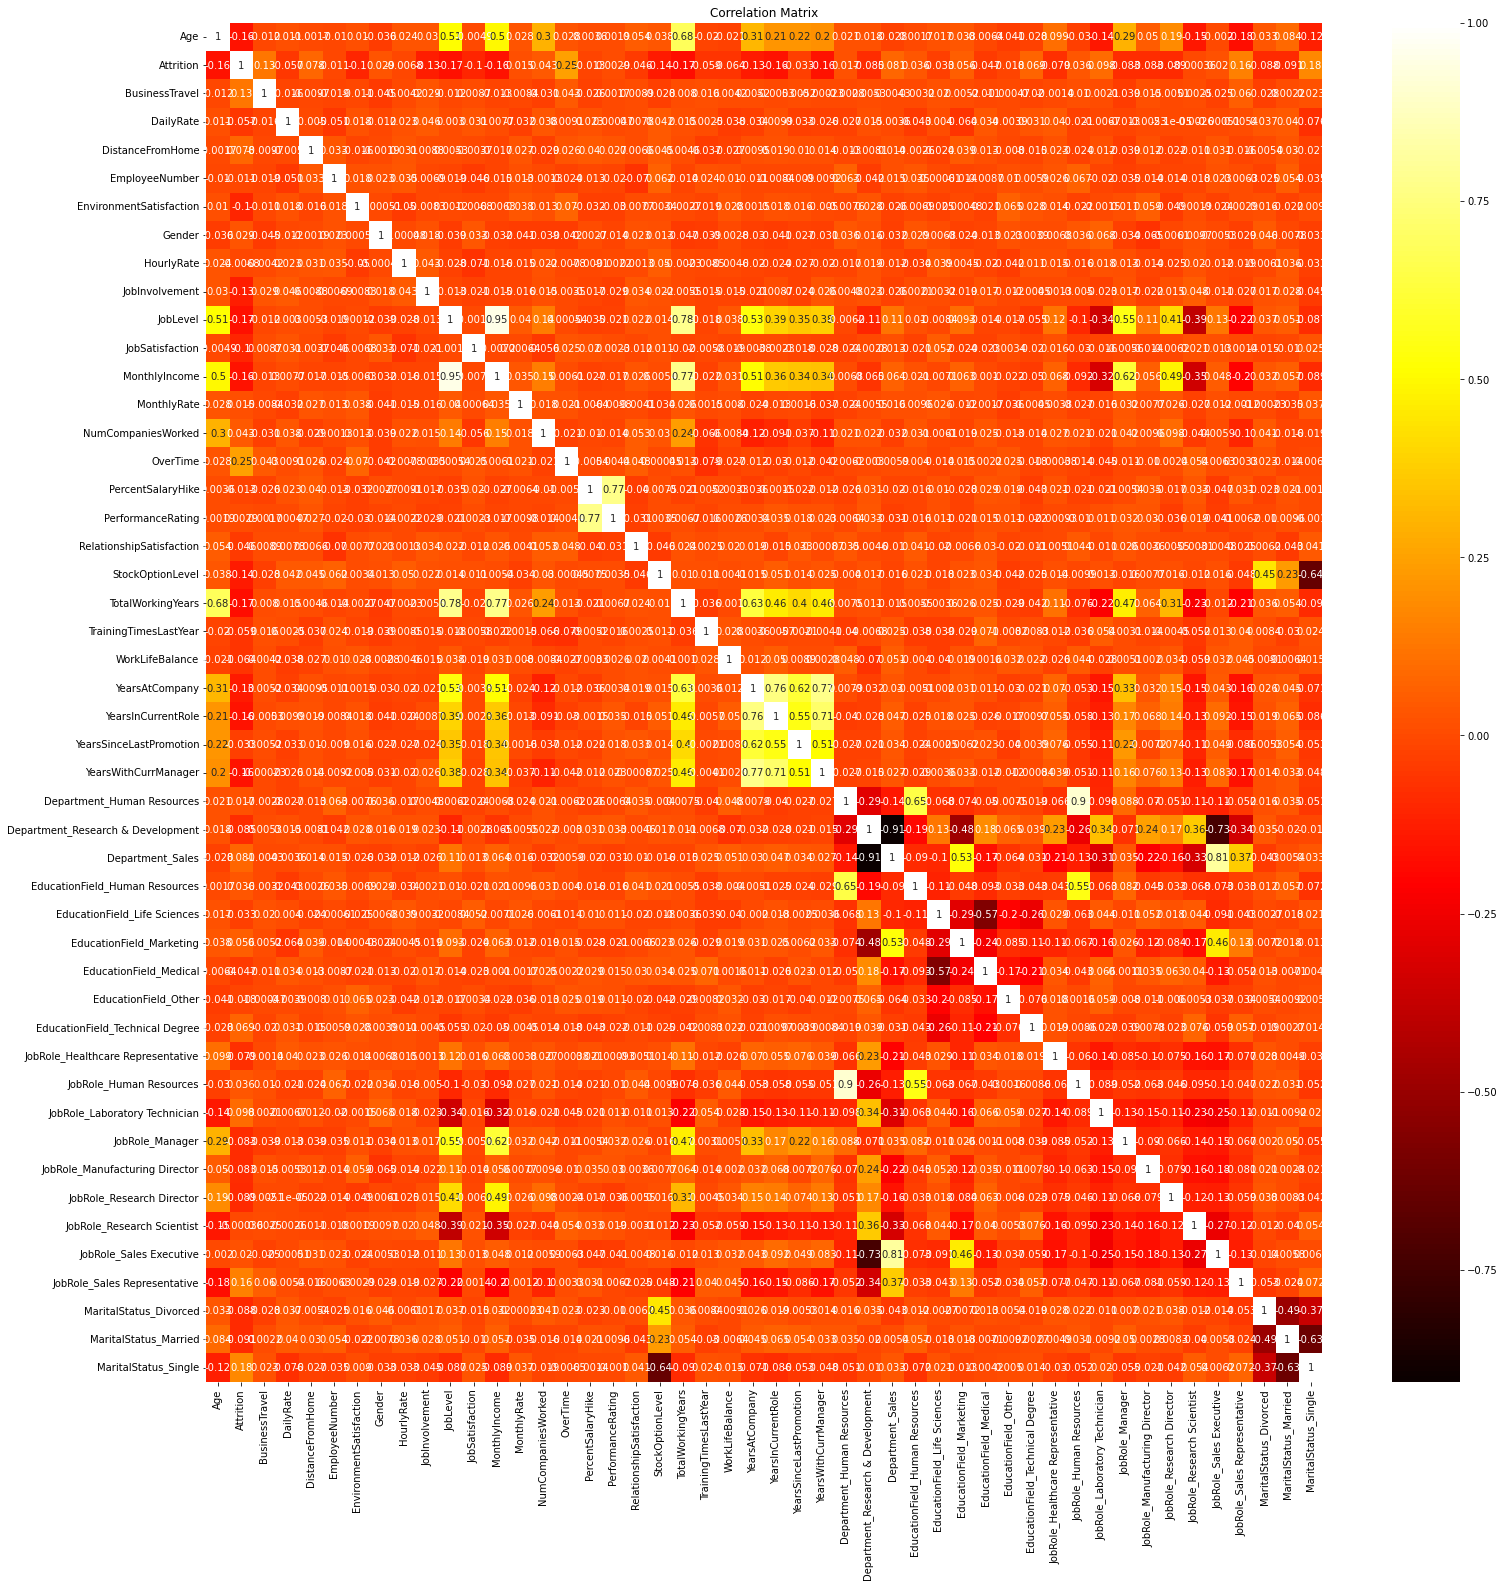

In [63]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap='hot').set(title='Correlation Matrix')

**"JobLevel", "TotalWorkingYears", "Department_Sales" ve "JobRole_Human Resources" değişkenleri diğer değişkenler ile çok yüksek korelasyonlara sahip oldukları için modelden çıkartılmışlardır.**

In [64]:
df.drop(columns=["JobLevel", "TotalWorkingYears", "Department_Sales", "JobRole_Human Resources"], inplace=True)

[Text(0.5, 1.0, 'Correlation Matrix')]

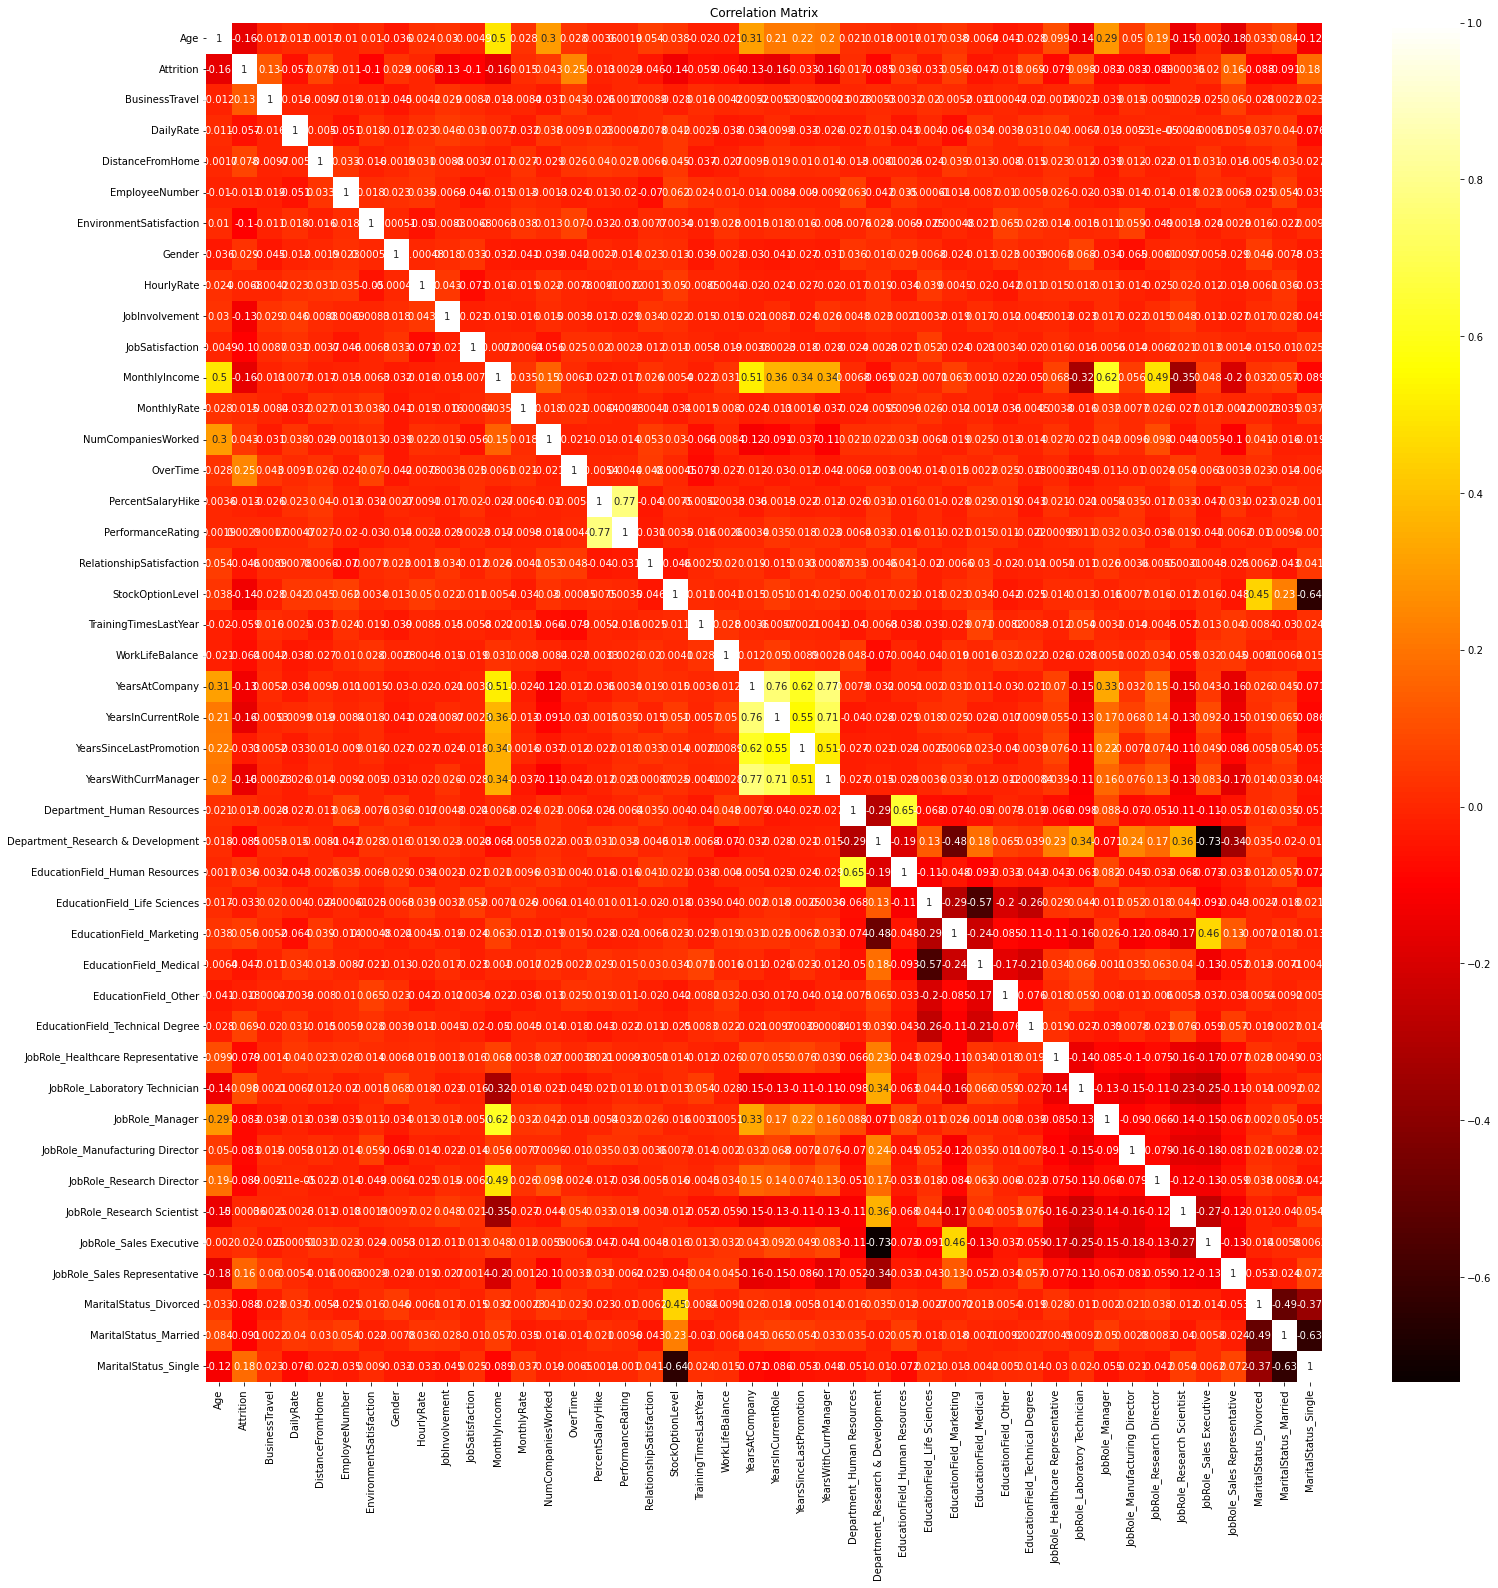

In [65]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap='hot').set(title='Correlation Matrix')

# Statistical Analysis

***İstatistikte Ki-Kare testi kategorik değişkenler arasındaki ilişkiyi test etmek için kullanılır. <br> T testi ise iki grup ortalaması arasındaki farkın istatistiksel anlamlılığını test etmek için kullanılır.***

**SORULAR** <br>
1-)  *Erkekler kadınlara göre ayrılmaya daha meyilli midir? <br>
2-)  Genç olan erkekler yaşı ilerlemiş erkeklere göre ayrılmaya daha meyilli midir? <br>
3-)  Daha sık seyahat eden çalışanlar diğer çalışanlara göre ayrılmaya daha meyilli midir? <br>
4-)  İşyerine uzaklığı fazla olan kişiler yakın olan kişilere göre ayrılmaya daha mı meyilli? <br>
5-)  İşe bağlılık seviyesi düşük olan çalışanlar ayrılmaya daha mı meyilli? <br>
6-)  Bekar kişiler diğerlerine göre ayrılmaya daha mı meyilli? <br>
7-)  Aylık maaşı az olan kişiler  fazla olan kişilere göre ayrılmaya daha mı meyilli? <br>
8-)  Mesai yapan kişiler yapmayan kişilere göre ayrılmaya daha mı meyilli? <br>
9-)  Maaşına az zam alan kişiler fazla zam alan kişilere göre ayrılmaya daha mı meyilli? <br>
10-) Şirkette yeni kişiler eski kişilere göre ayrılmaya daha mı meyilli?*

***Testlerimizi 0.05 anlamlılık düzeyinde gerçekleştireceğiz.***

In [66]:
alpha=0.05

***1.SORU***

***İşten ayrılmada cinsiyetin önemli bir faktör olup olmadığını test edeceğiz.***

In [67]:
df.groupby("Gender").mean()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.329932,0.147959,1.115646,808.273810,9.210884,1008.239796,2.721088,65.903061,2.714286,2.683673,6686.566327,14674.600340,2.812925,0.306122,15.197279,3.159864,2.681973,0.780612,2.860544,2.763605,7.231293,4.413265,2.294218,4.256803,0.034014,0.644558,0.013605,0.408163,0.117347,0.323129,0.049320,0.088435,0.086735,0.144558,0.079932,0.122449,0.056122,0.193878,0.224490,0.064626,0.198980,0.462585,0.338435
1,36.653061,0.170068,1.066893,798.626984,9.180272,1035.948980,2.722222,65.883220,2.740363,2.758503,6380.507937,14072.105442,2.613379,0.267574,15.217687,3.149660,2.732426,0.802721,2.758503,2.759637,6.859410,4.106576,2.116780,4.034014,0.048753,0.659864,0.021542,0.414966,0.102041,0.310658,0.060091,0.090703,0.090703,0.197279,0.062358,0.082766,0.053288,0.201814,0.219955,0.051020,0.238095,0.454649,0.307256


**Hipotez:**

<d><i>H</i><sub>0</sub>:  Cinsiyet işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  Cinsiyet işten ayrılmada önemli bir faktördür.

In [68]:
observed=pd.crosstab(index=df["Attrition"], columns=df["Gender"])
test_result, p_value_gender, ser_der, expected=chi2_contingency(observed)

In [69]:
if p_value_gender<alpha:
    print("p-value:", p_value_gender,"\n\nSıfır hipotezini reddederiz. Cinsiyet işten ayrılmada önemli bir faktördür. Erkekler kadınlara göre ayrılmaya"
          "daha meyillidir")
else:
    print("p-value:", p_value_gender,"\n\nSıfır hipotezini reddedemeyiz. Cinsiyet işten ayrılmada önemli bir faktör değildir")

p-value: 0.29057244902890855 

Sıfır hipotezini reddedemeyiz. Cinsiyet işten ayrılmada önemli bir faktör değildir


***2.SORU***

***İşten ayrılan erkeklerin yaşlarının ortalaması ile işten ayrılmayan erkeklerin yaşlarının ortalaması arasında anlamlı bir fark olup olmadığıın test edeceğiz.***

***İki grup t testini uygulamamız için 2 varsayımın sağlanması gerekiyor. Birincisi grupların normal dağılması ikincisi ise grupların varyanslarının eşit olması. Normallik için Shapiro-Wilk, varyans için Levene testini uygulayacağız.***

In [70]:
G11 = df[(df["Gender"]==1) & (df["Attrition"]==1)].Age
G10 = df[(df["Gender"]==1) & (df["Attrition"]==0)].Age

<d><i>G1</i><sub>1</sub>: İşten ayrılan erkeklerin yaşları. <br>
<d><i>G1</i><sub>0</sub>: İşten ayrılmayan erkeklerin yaşları.

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>G1</i><sub>1</sub>'in dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>G1</i><sub>1</sub>'in dağılımı ile normal dağılım arasında fark vardır.

In [71]:
name = ['normality test', 'p-value']
test = shapiro(G11)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.9481711387634277, pvalue=2.3152020730776712e-05) 

Sıfır hipotezini reddederiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


***Bu varsayım sağlanmadığı için diğer grubun normalliğini ve grupların varyanslarının eşit olup olmadığını ölçmeye gerek yoktur. Bu yüzden İki Grup T testinin non-parametrik karşılığı olan Mann-Whitney U testini kullanacağız.***

<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan erkeklerin yaşlarının ortalaması</i> <br>
<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan erkeklerin yaşlarının ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub><<d><i>μ</i><sub>1</sub>

In [72]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(G11, G10)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olduğunu söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan erkeklerin yaşlarının "
           "ortalaması ile işten ayrılmayan erkeklerin yaşlarının ortalaması arasında anlamlı bir fark vardır. Genç olan erkekler işten ayrılmaya "
          "daha meyillidir")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olduğunu söylemek için elimizde yeterli kanıt vadır. İşten ayrılan erkeklerin yaşlarının "
           "ortalaması ile işten ayrılmayan erkeklerin yaşlarının ortalaması arasında anlamlı bir farklılık yoktur")

p-value: 0.000 

Sıfır hipotezini reddederiz. μo ve μ1'in eşit olduğunu söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan erkeklerin yaşlarının ortalaması ile işten ayrılmayan erkeklerin yaşlarının ortalaması arasında anlamlı bir fark vardır. Genç olan erkekler işten ayrılmaya daha meyillidir


***3.SORU***

In [73]:
df.groupby("BusinessTravel").mean()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
BusinessTravel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,36.620000,0.080000,816.960000,9.760000,1064.626667,2.733333,0.673333,64.866667,2.633333,2.793333,6261.946667,14635.600000,2.713333,0.233333,15.606667,3.173333,2.780000,0.866667,2.720000,2.773333,7.146667,4.353333,2.386667,4.300000,0.040000,0.646667,0.026667,0.420000,0.080000,0.333333,0.046667,0.093333,0.100000,0.186667,0.080000,0.086667,0.040000,0.186667,0.260000,0.033333,0.293333,0.393333,0.313333
1,37.092042,0.149569,803.022052,9.088207,1021.793864,2.727709,0.595398,66.249281,2.742090,2.702780,6619.707574,14265.372963,2.744966,0.282838,15.165868,3.147651,2.685523,0.790988,2.806328,2.755513,6.944391,4.208054,2.117929,4.072867,0.044104,0.653883,0.016299,0.402685,0.115053,0.314477,0.058485,0.093001,0.086290,0.172579,0.073826,0.098754,0.059444,0.201342,0.218600,0.052733,0.210930,0.475551,0.313519
2,36.454874,0.249097,792.628159,9.277978,1014.898917,2.693141,0.577617,65.097473,2.736462,2.790614,6193.725632,14318.187726,2.487365,0.310469,15.158845,3.166065,2.776173,0.765343,2.815884,2.776173,7.173285,4.241877,2.342960,4.216606,0.039711,0.657040,0.021661,0.444043,0.097473,0.310469,0.050542,0.075812,0.093863,0.184116,0.046931,0.104693,0.043321,0.194946,0.212996,0.083032,0.227437,0.425993,0.346570


***İşten ayrılmada sık sık seyahat etmenin önemli bir faktör olup olmadığına bakacağız.***

**Hipotez:**

<d><i>H</i><sub>0</sub>:  Seyahat sıklığı işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  Seyahat sıklığı işten ayrılmada önemli bir faktördür.

In [74]:
observed=pd.crosstab(index=df["Attrition"], columns=df["BusinessTravel"])
test_result, p_value_travel, ser_der, expected=chi2_contingency(observed)

In [75]:
if p_value_travel<alpha:
    print("p-value:", p_value_travel,"\n\nSıfır hipotezini reddederiz. Seyahat sıklığı işten ayrılmada önemli bir faktördür. Daha sık seyahat eden "
          "kişiler diğer kişilere göre ayrılmaya daha \nmeyillidirler.")
else:
    print("Sıfır hipotezini reddedemeyiz. Seyahat sıklığı işten ayrılmada önemli bir faktör değildir.")

p-value: 5.608614476449942e-06 

Sıfır hipotezini reddederiz. Seyahat sıklığı işten ayrılmada önemli bir faktördür. Daha sık seyahat eden kişiler diğer kişilere göre ayrılmaya daha 
meyillidirler.


***4.SORU***

In [76]:
df.groupby("Attrition").mean()

,Age,BusinessTravel,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.056772,812.504461,8.915653,1027.656123,2.771290,0.593674,65.952149,2.770479,2.778589,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.041363,0.671533,0.016221,0.419303,0.100568,0.325223,0.057583,0.081103,0.098946,0.159773,0.078670,0.109489,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861
1,33.607595,1.240506,750.362869,10.632911,1010.345992,2.464135,0.632911,65.573840,2.518987,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,0.050633,0.561181,0.029536,0.375527,0.147679,0.265823,0.046414,0.135021,0.037975,0.261603,0.021097,0.042194,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329


***İşten ayrılan kişilerin işyerine olan uzaklıklarının ortalaması ile işten ayrılmayan kişilerin işyerine olan uzaklıklarınınn ortalaması arasında anlamlı bir fark olup olmadığıın test edeceğiz.***

In [77]:
dis1 = df[df["Attrition"]==1].DistanceFromHome
dis0 = df[df["Attrition"]==0].DistanceFromHome

<d><i>dis1</i>: İşten ayrılan kişilerin işyerine olan uzaklıklar. <br>
<d><i>dis0</i>: İşten ayrılmayan kişilerin işyerine olan uzaklıklar.

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>dis0</i>'ın dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>dis0</i>'in dağılımı ile normal dağılım arasında fark vardır.

In [78]:
name = ['normality test', 'p-value']
test = shapiro(dis0)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.8534793257713318, pvalue=2.4682859931885524e-32) 

Sıfır hipotezini reddederiz. G11'in normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


***Bu varsayım sağlanmadığı için diğer grubun normalliğini ve grupların varyanslarının eşit olup olmadığını ölçmeye gerek yoktur. Bu yüzden İki Grup T testinin non-parametrik karşılığı olan Mann-Whitney U testini kullanacağız.***

<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan kişilerin işyerine olan uzaklıklarının ortalaması</i> <br>
<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan kişilerin işyerine olan uzaklıklarının ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub><<d><i>μ</i><sub>1</sub>

In [79]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(dis0, dis1)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin işyerine "
           "olan uzaklıklarının ortalaması ile işten ayrılmayan kişilerin işyerine uzaklıkları ortalaması arasında anlamlı bir fark vardır. İşyerine"
          " uzak olan kişiler daha çok işten ayrılır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin işyerine "
           "olan uzaklıklarının ortalaması ile işten ayrılmayan kişilerin işyerine uzaklıkları ortalaması arasında anlamlı bir fark yoktur")

p-value: 0.002 

Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin işyerine olan uzaklıklarının ortalaması ile işten ayrılmayan kişilerin işyerine uzaklıkları ortalaması arasında anlamlı bir fark vardır. İşyerine uzak olan kişiler daha çok işten ayrılır.


***5.SORU***

In [80]:
df.groupby("JobInvolvement").mean()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
JobInvolvement,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,35.975904,0.337349,1.012048,726.951807,9.915663,1096.578313,2.566265,0.626506,64.927711,2.915663,6418.108434,14664.590361,2.506024,0.301205,15.807229,3.204819,2.650602,0.891566,2.927711,2.734940,6.939759,4.253012,2.253012,3.987952,0.036145,0.614458,0.024096,0.457831,0.084337,0.313253,0.048193,0.072289,0.084337,0.228916,0.048193,0.096386,0.048193,0.144578,0.228916,0.084337,0.265060,0.397590,0.337349
2,36.528000,0.189333,1.077333,787.968000,8.826667,1013.650667,2.757333,0.576000,64.866667,2.680000,6609.648000,14602.298667,2.637333,0.280000,15.202667,3.154667,2.656000,0.746667,2.754667,2.789333,7.330667,4.162667,2.256000,4.053333,0.045333,0.661333,0.021333,0.394667,0.117333,0.309333,0.064000,0.093333,0.098667,0.178667,0.061333,0.112000,0.048000,0.189333,0.221333,0.053333,0.189333,0.466667,0.344000
3,37.209677,0.144009,1.096774,814.279954,9.215438,1018.976959,2.746544,0.602535,66.003456,2.745392,6521.637097,14102.298387,2.750000,0.282258,15.119816,3.150922,2.733871,0.784562,2.824885,2.756912,6.906682,4.241935,2.203917,4.110599,0.041475,0.645161,0.013825,0.412442,0.114055,0.312212,0.054147,0.093318,0.081797,0.169355,0.077189,0.095622,0.057604,0.199309,0.225806,0.058756,0.230415,0.450461,0.319124
4,36.777778,0.090278,1.090278,812.736111,9.590278,1048.229167,2.569444,0.631944,68.437500,2.645833,6161.159722,14628.083333,2.604167,0.284722,15.423611,3.138889,2.763889,0.916667,2.687500,2.729167,6.819444,4.312500,1.875000,4.458333,0.048611,0.708333,0.034722,0.430556,0.062500,0.354167,0.048611,0.069444,0.111111,0.180556,0.055556,0.083333,0.055556,0.250000,0.194444,0.034722,0.236111,0.513889,0.250000


***İşten ayrılmada çalışanın işe bağlılık seviyesinin önemli bir faktör olup olmadığına bakacağız.***

**Hipotez:**

<d><i>H</i><sub>0</sub>:  İşe bağlılık seviyesi işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  İşe bağlılık seviyesi işten ayrılmada önemli bir faktördür.

In [81]:
observed=pd.crosstab(index=df["Attrition"], columns=df["JobInvolvement"])
test_result, p_value_job_i, ser_der, expected=chi2_contingency(observed)

In [82]:
if p_value_job_i<alpha:
    print("p-value:",p_value_job_i,"\n\nSıfır hipotezini reddederiz. İşe bağlılık seviyesi işten ayrılmada önemli bir faktördür. İşe bağlılık seviyesi"
          " düşük olan kişiler diğer kişilere göre ayrılmaya daha meyillidirler.")
else:
    print("Sıfır hipotezini reddedemeyiz. İşe bağlılık seviyesi işten ayrılmada önemli bir faktör değildir.")

p-value: 2.8631806367134195e-06 

Sıfır hipotezini reddederiz. İşe bağlılık seviyesi işten ayrılmada önemli bir faktördür. İşe bağlılık seviyesi düşük olan kişiler diğer kişilere göre ayrılmaya daha meyillidirler.


***6.SORU***

***İşten ayrılmada evlilik durumunun önemli bir faktör olup olmadığına bakacağız.***

**Hipotez:**

<d><i>H</i><sub>0</sub>:  Evlilik durumu işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  Evlilik durumu işten ayrılmada önemli bir faktördür.

In [83]:
observed=pd.crosstab(index=df["Attrition"], columns=df["MaritalStatus_Single"])
test_result, p_value_single, ser_der, expected=chi2_contingency(observed)

In [84]:
if p_value_single<alpha:
    print("p-value:", p_value_single,"\n\nSıfır hipotezini reddederiz. Evlilik durumu işten ayrılmada önemli bir faktördür. Hiç evlenmemiş kişiler" 
          " diğer kişilere göre ayrılmaya daha \nmeyillidirler.")
else:
    print("Sıfır hipotezini reddedemeyiz. Evlilik durumu işten ayrılmada önemli bir faktör değildir.")

p-value: 2.9387255399500764e-11 

Sıfır hipotezini reddederiz. Evlilik durumu işten ayrılmada önemli bir faktördür. Hiç evlenmemiş kişiler diğer kişilere göre ayrılmaya daha 
meyillidirler.


***7.SORU***

In [85]:
df.groupby("Attrition").mean()

,Age,BusinessTravel,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.056772,812.504461,8.915653,1027.656123,2.771290,0.593674,65.952149,2.770479,2.778589,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.041363,0.671533,0.016221,0.419303,0.100568,0.325223,0.057583,0.081103,0.098946,0.159773,0.078670,0.109489,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861
1,33.607595,1.240506,750.362869,10.632911,1010.345992,2.464135,0.632911,65.573840,2.518987,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,0.050633,0.561181,0.029536,0.375527,0.147679,0.265823,0.046414,0.135021,0.037975,0.261603,0.021097,0.042194,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329


***İşten ayrılan kişilerin aylık maaşlarının ortalaması ile işten ayrılmayan kişilerin aylık maaşlarının ortalaması arasında anlamlı bir fark olup olmadığını test edeceğiz.***

In [86]:
mis1 = df[df["Attrition"]==1].MonthlyIncome
mis0 = df[df["Attrition"]==0].MonthlyIncome

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>mis0</i>'ın dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>mis0</i>'in dağılımı ile normal dağılım arasında fark vardır.

In [87]:
name = ['normality test', 'p-value']
test = shapiro(mis0)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. mis0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. mis0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.8341342210769653, pvalue=5.970143412461947e-34) 

Sıfır hipotezini reddederiz. mis0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan kişilerin aylık maaşlarının ortalaması</i> <br>
<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan kişilerin aylık maaşlarının ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub>><d><i>μ</i><sub>1</sub>

In [88]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(mis0, mis1)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin aylık "
           "maaşlarının \nortalaması ile işten ayrılmayan kişilerin aylık maaşlarının ortalaması arasında anlamlı bir fark vardır. Aylık maaşı düşük"
          " olan kişiler daha çok işten \nayrılır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin aylık "
           "maaşlarının ortalaması ile işten ayrılmayan kişilerin aylık maaşlarının ortalaması arasında anlamlı bir fark yoktur")

p-value: 0.000 

Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin aylık maaşlarının 
ortalaması ile işten ayrılmayan kişilerin ayllık maaşlarının ortalaması arasında anlamlı bir fark vardır. Aylık maaşı düşük olan kişiler daha çok işten 
ayrılır.


***8.SORU***

***İşten ayrılmada mesai durumunun önemli bir faktör olup olmadığına bakacağız.***

In [89]:
df.groupby("OverTime").mean()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
OverTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,36.762808,0.104364,1.072106,800.170778,9.062619,1033.953510,2.673624,0.612903,65.990512,2.731499,2.711575,6484.926945,14217.302657,2.725806,15.222011,3.152751,2.679317,0.794118,2.863378,2.773245,7.053131,4.296964,2.212524,4.216319,0.043643,0.654649,0.018027,0.416509,0.105313,0.314991,0.052182,0.092979,0.089184,0.186907,0.071157,0.100569,0.054080,0.185009,0.220114,0.055977,0.216319,0.462049,0.321632
1,37.331731,0.305288,1.122596,808.350962,9.521635,1001.838942,2.843750,0.567308,65.639423,2.725962,2.771635,6548.548077,14555.829327,2.610577,15.177885,3.156250,2.795673,0.793269,2.637019,2.730769,6.894231,4.057692,2.125000,3.887019,0.040865,0.651442,0.019231,0.401442,0.115385,0.317308,0.064904,0.081731,0.088942,0.149038,0.064904,0.093750,0.055288,0.233173,0.225962,0.057692,0.237981,0.447115,0.314904


**Hipotez:**

<d><i>H</i><sub>0</sub>:  Mesai durumu işten ayrılmada önemli bir faktör değildir.  
<d><i>H</i><sub>1</sub>:  Mesai durumu işten ayrılmada önemli bir faktördür.

In [90]:
observed=pd.crosstab(index=df["Attrition"], columns=df["OverTime"])
test_result, p_value_overtime, ser_der, expected=chi2_contingency(observed)

In [93]:
if p_value_overtime<alpha:
    print("p-value:", p_value_single,"\n\nSıfır hipotezini reddederiz. Mesai durumu işten ayrılmada önemli bir faktördür. Mesai yapan kişiler" 
          " yapmayan kişilere göre ayrılmaya daha \nmeyillidirler.")
else:
    print("Sıfır hipotezini reddedemeyiz. Mesai durumu işten ayrılmada önemli bir faktör değildir.")

p-value: 2.9387255399500764e-11 

Sıfır hipotezini reddederiz. Mesai durumu işten ayrılmada önemli bir faktördür. Mesai yapan kişiler yapmayan kişilere göre ayrılmaya daha 
meyillidirler.


***9.SORU***

***İşten ayrılan kişilerin aldıkları zamların ortalaması ile işten ayrılmayan kişilerin aldıkları zamların ortalaması arasında anlamlı bir fark olup olmadığını test edeceğiz.***

In [98]:
df.groupby("Attrition").mean()

,Age,BusinessTravel,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.056772,812.504461,8.915653,1027.656123,2.771290,0.593674,65.952149,2.770479,2.778589,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.041363,0.671533,0.016221,0.419303,0.100568,0.325223,0.057583,0.081103,0.098946,0.159773,0.078670,0.109489,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861
1,33.607595,1.240506,750.362869,10.632911,1010.345992,2.464135,0.632911,65.573840,2.518987,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,0.050633,0.561181,0.029536,0.375527,0.147679,0.265823,0.046414,0.135021,0.037975,0.261603,0.021097,0.042194,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329


In [99]:
psh1 = df[df["Attrition"]==1].PercentSalaryHike
psh0 = df[df["Attrition"]==0].PercentSalaryHike

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>psh0</i>'ın dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>psh0</i>'in dağılımı ile normal dağılım arasında fark vardır.

In [100]:
test = shapiro(psh0)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. psh0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. psh0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.9026836156845093, pvalue=2.707782968319606e-27) 

Sıfır hipotezini reddederiz. psh0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan kişilerin aldıkları zamların ortalaması</i> <br>
<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan kişilerin aldıkları zamların ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub>><d><i>μ</i><sub>1</sub>

In [107]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(psh0, psh1)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin aldıkları "
           "zamların \nortalaması ile işten ayrılmayan kişilerin aldıkları zamların ortalaması arasında anlamlı bir fark vardır. Aldıkları zam oranı"
          "düşük olan kişiler daha \nçok işten ayrılır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin aldıkları "
           "zamların \nortalaması ile işten ayrılmayan kişilerin aldıkları zamların ortalaması arasında anlamlı bir fark yoktur")

p-value: 0.366 

Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin aldıkları zamların 
ortalaması ile işten ayrılmayan kişilerin aldıkları zamların ortalaması arasında anlamlı bir fark yoktur


***10.SORU***

***İşten ayrılan kişilerin şirkette geçirdikleri yılların ortalaması ile işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması arasında anlamlı bir fark olup olmadığını test edeceğiz.***

In [108]:
df.groupby("Attrition").mean()

,Age,BusinessTravel,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.056772,812.504461,8.915653,1027.656123,2.771290,0.593674,65.952149,2.770479,2.778589,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.041363,0.671533,0.016221,0.419303,0.100568,0.325223,0.057583,0.081103,0.098946,0.159773,0.078670,0.109489,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861
1,33.607595,1.240506,750.362869,10.632911,1010.345992,2.464135,0.632911,65.573840,2.518987,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,0.050633,0.561181,0.029536,0.375527,0.147679,0.265823,0.046414,0.135021,0.037975,0.261603,0.021097,0.042194,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329


In [109]:
yac1 = df[df["Attrition"]==1].YearsAtCompany
yac0 = df[df["Attrition"]==0].YearsAtCompany

**Hipotez:**

<d><i>H</i><sub>0</sub>:  <d><i>yac0</i>'ın dağılımı ile normal dağılım arasında fark yoktur.<br>
<d><i>H</i><sub>1</sub>:  <d><i>yac0</i>'in dağılımı ile normal dağılım arasında fark vardır.

In [110]:
test = shapiro(yac0)
 
print(test, "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. yac0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. yac0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt yoktur.")

ShapiroResult(statistic=0.8515459299087524, pvalue=1.6729588581128763e-32) 

Sıfır hipotezini reddederiz. yac0'ın normal dağılmadığını söylemek için elimizde yeterli kanıt vardır.


<d><i>μ</i><sub>1</sub>: <d><i>işten ayrılan kişilerin şirkette geçirdikleri yılların ortalaması</i> <br>
<d><i>μ</i><sub>0</sub>: <d><i>işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması</i>

**Hipotez:** <br>
<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub> <br>
<d><i>H</i><sub>1</sub>: <d><i>μ</i><sub>0</sub>><d><i>μ</i><sub>1</sub>

In [114]:
name = ['Mann Whitney-U', 'p-value']
test = mannwhitneyu(yac0, yac1)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] < alpha:
    print("Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin şirkette "
           "geçirdikleri \nyılların ortalaması ile işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması arasında anlamlı bir fark "
          "vardır. Şirkette yeni olan \nkişiler eski olan kişilere göre daha çok işten ayrılır.")
 
else:
    print("Sıfır hipotezini reddedemeyiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt yoktur. İşten ayrılan kişilerin şirkette "
           "geçirdikleri yılların \nortalaması ile işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması arasında anlamlı bir fark "
          "yoktur")

p-value: 0.000 

Sıfır hipotezini reddederiz. μo ve μ1'in eşit olmadığını söylemek için elimizde yeterli kanıt vardır. İşten ayrılan kişilerin şirkette geçirdikleri 
yılların ortalaması ile işten ayrılmayan kişilerin şirkette geçirdikleri yılların ortalaması arasında anlamlı bir fark vardır. Şirkette yeni olan 
kişiler eski olan kişilere göre daha çok işten ayrılır.


# Model

In [377]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.metrics import precision_score, recall_score, f1_score, brier_score_loss
from sklearn.metrics import classification_report

In [115]:
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,1,2,0,94,3,4,5993,19479,8,1,11,3,1,0,0,1,6,4,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,2,3,1,61,2,2,5130,24907,1,0,23,4,4,1,3,3,10,7,1,7,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,4,4,1,92,2,3,2090,2396,6,1,15,3,2,0,3,3,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,5,4,0,56,3,3,2909,23159,1,1,11,3,3,0,3,3,8,7,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,7,1,1,40,3,2,3468,16632,9,0,12,3,4,1,3,3,2,2,2,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2061,3,1,41,4,4,2571,12290,4,0,17,3,3,1,3,3,5,2,0,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,2062,4,1,42,2,1,9991,21457,4,0,15,3,1,1,5,3,7,7,1,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,2064,2,1,87,4,2,6142,5174,1,1,20,4,2,1,0,3,6,2,0,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,2065,4,1,63,2,2,5390,13243,2,0,14,3,4,0,3,2,9,6,0,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [116]:
x = df.drop(["Attrition", "EmployeeNumber"], axis=1)
y = df["Attrition"]

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

## Random Forest

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [231]:
rf_predicts= rf.predict(x_test)

In [232]:
rf_cm= confusion_matrix(y_test, rf_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_cm)


Logistic Regression Confusion Matrix:

[[402   4]
 [ 69  11]]


In [233]:
target_names = ['0', '1']
print(classification_report(y_test, rf_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       406
           1       0.73      0.14      0.23        80

    accuracy                           0.85       486
   macro avg       0.79      0.56      0.57       486
weighted avg       0.83      0.85      0.80       486



In [424]:
rf_accuracy = accuracy_score(rf_predicts, y_test)
rf_f1 = f1_score(rf_predicts, y_test)
rf_roc_auc =roc_auc_score(y_test, rf_predicts)

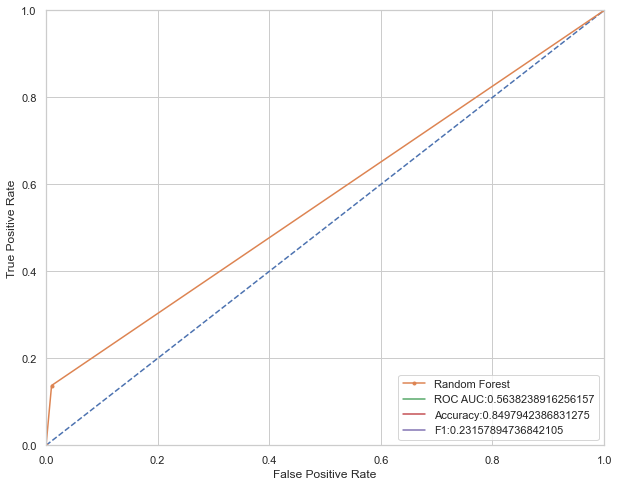

In [427]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, rf_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.plot(0, label = 'ROC AUC:'+str(rf_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(rf_accuracy))
plt.plot(0, label = 'F1:'+str(rf_f1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [370]:
rf_class1_probs = rf.predict_proba(x_test)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    rf_thresh_predicts = rf_class1_probs > threshold
    precision = precision_score(y_test, rf_thresh_predicts)
    recall = recall_score(y_test, rf_thresh_predicts)
    f1 = f1_score(y_test, rf_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.166, Completeness = 1.000 | F1 = 0.284
Threshold = 0.01 | Accuracy = 0.167, Completeness = 1.000 | F1 = 0.286
Threshold = 0.02 | Accuracy = 0.174, Completeness = 1.000 | F1 = 0.296
Threshold = 0.03 | Accuracy = 0.181, Completeness = 1.000 | F1 = 0.307
Threshold = 0.04 | Accuracy = 0.188, Completeness = 0.988 | F1 = 0.315
Threshold = 0.05 | Accuracy = 0.194, Completeness = 0.975 | F1 = 0.323
Threshold = 0.06 | Accuracy = 0.200, Completeness = 0.963 | F1 = 0.331
Threshold = 0.07 | Accuracy = 0.206, Completeness = 0.925 | F1 = 0.336
Threshold = 0.08 | Accuracy = 0.224, Completeness = 0.912 | F1 = 0.360
Threshold = 0.09 | Accuracy = 0.232, Completeness = 0.875 | F1 = 0.366
Threshold = 0.10 | Accuracy = 0.249, Completeness = 0.875 | F1 = 0.388
Threshold = 0.11 | Accuracy = 0.255, Completeness = 0.850 | F1 = 0.392
Threshold = 0.12 | Accuracy = 0.266, Completeness = 0.812 | F1 = 0.401
Threshold = 0.13 | Accuracy = 0.276, Completeness = 0.800 | F1 = 0.410
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [372]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    rf_thresh_predicts = rf_class1_probs > threshold
    f1 = f1_score(y_test, rf_thresh_predicts)
    if f1_list.max() == f1:
        rf_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_best_threshold)

Maximum f1 score is: 0.517 and best threshold is: 0.22


In [414]:
def custom_predict(X, threshold):
    
    return (rf_class1_probs > threshold).astype(int)
    
    
rf_thresh_predicts = custom_predict(X = x_test, threshold = rf_best_threshold) 

In [415]:
rf_thresh_cm= confusion_matrix(y_test, rf_thresh_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_thresh_cm)


Random Forest Confusion Matrix:

[[337  69]
 [ 28  52]]


In [416]:
print(classification_report(y_test, rf_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       406
           1       0.43      0.65      0.52        80

    accuracy                           0.80       486
   macro avg       0.68      0.74      0.70       486
weighted avg       0.84      0.80      0.82       486



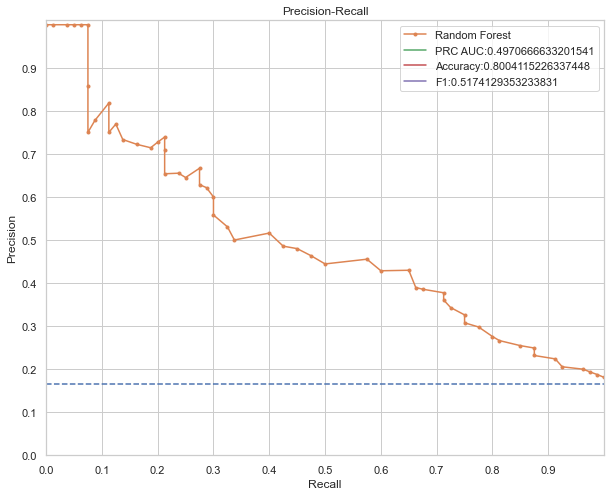

In [430]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, rf_class1_probs)
rf_thresh_f1, rf_prc_auc = f1_score(y_test, rf_thresh_predicts), auc(recall, precision)
rf_thresh_accuracy = accuracy_score(y_test, rf_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Random Forest')
plt.plot(0,label='PRC AUC:'+str(rf_prc_auc))
plt.plot(0,label='Accuracy:'+str(rf_thresh_accuracy))
plt.plot(0,label='F1:'+str(rf_thresh_f1))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()

## Bagging

In [431]:
from sklearn.ensemble import BaggingClassifier

In [432]:
bag = BaggingClassifier().fit(x_train, y_train)

In [433]:
bag_predicts= bag.predict(x_test)

In [434]:
bag_cm= confusion_matrix(y_test, bag_predicts)
print("\nBagging Classifier Confusion Matrix:\n")
print(bag_cm)


Bagging Classifier Confusion Matrix:

[[391  15]
 [ 61  19]]


In [435]:
print(classification_report(y_test, bag_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       406
           1       0.56      0.24      0.33        80

    accuracy                           0.84       486
   macro avg       0.71      0.60      0.62       486
weighted avg       0.81      0.84      0.82       486



In [436]:
bag_accuracy = accuracy_score(bag_predicts, y_test)
bag_f1 = f1_score(bag_predicts, y_test)
bag_roc_auc =roc_auc_score(y_test, bag_predicts)

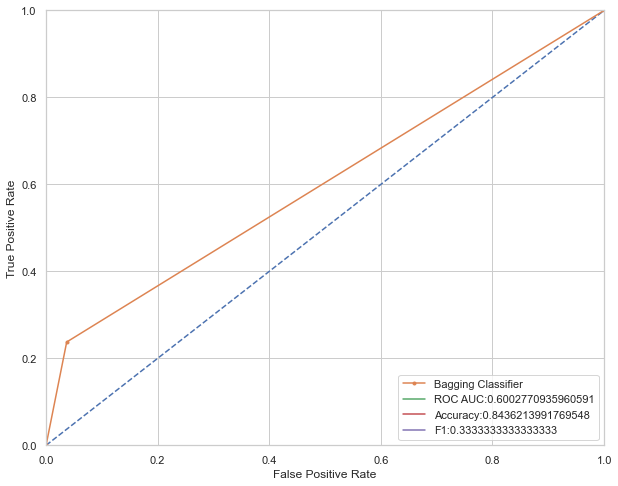

In [437]:
n_probs = [0 for _ in range(len(y_test))]
n_fpr, n_tpr, thresholds = roc_curve(y_test, n_probs)
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, bag_predicts)
plt.plot(n_fpr, n_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Bagging Classifier')
plt.plot(0, label = 'ROC AUC:'+str(bag_roc_auc))
plt.plot(0, label = 'Accuracy:'+str(bag_accuracy))
plt.plot(0, label = 'F1:'+str(bag_f1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.legend(loc=4)
plt.show()

In [440]:
bag_class1_probs = bag.predict_proba(x_test)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    bag_thresh_predicts = bag_class1_probs > threshold
    precision = precision_score(y_test, bag_thresh_predicts)
    recall = recall_score(y_test, bag_thresh_predicts)
    f1 = f1_score(y_test, bag_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.01 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.02 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.03 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.04 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.05 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.06 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.07 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.08 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.09 | Accuracy = 0.221, Completeness = 0.912 | F1 = 0.356
Threshold = 0.10 | Accuracy = 0.318, Completeness = 0.762 | F1 = 0.449
Threshold = 0.11 | Accuracy = 0.318, Completeness = 0.762 | F1 = 0.449
Threshold = 0.12 | Accuracy = 0.318, Completeness = 0.762 | F1 = 0.449
Threshold = 0.13 | Accuracy = 0.318, Completeness = 0.762 | F1 = 0.449
Thresh

In [441]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    bag_thresh_predicts = bag_class1_probs > threshold
    f1 = f1_score(y_test, bag_thresh_predicts)
    if f1_list.max() == f1:
        bag_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", bag_best_threshold)

Maximum f1 score is: 0.478 and best threshold is: 0.29


In [442]:
def custom_predict(X, threshold):
    #probs = logr.predict_proba(x_test) 
    return (bag_class1_probs > threshold).astype(int)
    
    
bag_thresh_predicts = custom_predict(X = x_test, threshold = bag_best_threshold) 

In [443]:
bag_thresh_cm= confusion_matrix(y_test, bag_thresh_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(bag_thresh_cm)


Random Forest Confusion Matrix:

[[333  73]
 [ 32  48]]


In [444]:
print(classification_report(y_test, bag_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       406
           1       0.40      0.60      0.48        80

    accuracy                           0.78       486
   macro avg       0.65      0.71      0.67       486
weighted avg       0.83      0.78      0.80       486



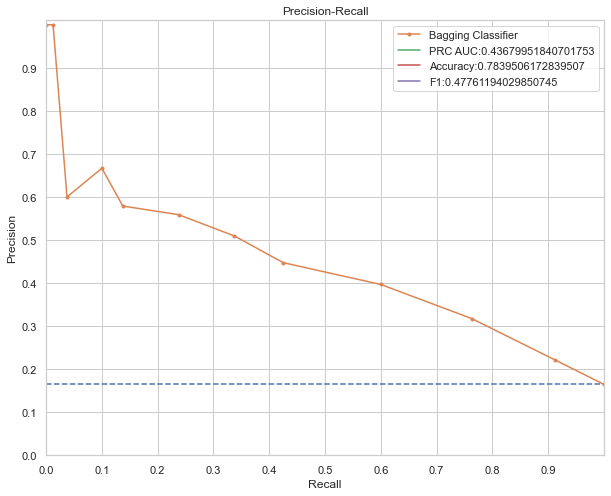

In [446]:
plt.figure(figsize=(10,8))
nor = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [nor, nor], linestyle='--')
precision, recall, threshold = precision_recall_curve(y_test, bag_class1_probs)
bag_thresh_f1, bag_prc_auc = f1_score(y_test, bag_thresh_predicts), auc(recall, precision)
bag_thresh_accuracy = accuracy_score(y_test, bag_thresh_predicts)
sns.set_theme(style= "whitegrid")

plt.plot(recall, precision, marker='.', label='Bagging Classifier')
plt.plot(0,label='PRC AUC:'+str(bag_prc_auc))
plt.plot(0,label='Accuracy:'+str(bag_thresh_accuracy))
plt.plot(0,label='F1:'+str(bag_thresh_f1))
plt.legend(loc=1)


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.01])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Precision-Recall')
plt.legend(loc=1)
plt.show()